# Exploratory Data Analysis of the new Merged customer Dataset

In [11]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
#import plotly

### Use the merged Customer-level dataset

In [12]:
data = pd.read_csv("/Users/dev/python1_cogitate/outputs/customer_analytics_merged.csv")
data.head()

,customer_id,name,age,email,city,registration_date,customer_tenure_days,total_policies,active_policies,avg_annual_premium,...,policy_ids,policy_tenure_days,total_claims,total_claimed_amount,avg_claim_amount,fraud_detected,detection_count,avg_confidence,claims_per_policy,fraud_rate
0,1,Kenneth Davis,56,customer1@email.com,New York,2023-12-30,589,1.0,1.0,4598.760,...,[256],1102.0,1.0,29430.41,29430.410,NaN,0.0,0.0,1.0,0.0
1,2,Deborah Moore,46,customer2@email.com,Los Angeles,2023-07-18,754,0.0,0.0,0.000,...,NaN,0.0,0.0,0.00,0.000,NaN,0.0,0.0,NaN,NaN
2,3,Joseph Rodriguez,60,customer3@email.com,Philadelphia,2022-12-31,953,1.0,1.0,5543.190,...,[257],686.0,1.0,23396.02,23396.020,NaN,0.0,0.0,1.0,0.0
3,4,Michael Baker,38,customer4@email.com,Philadelphia,2020-05-01,1927,0.0,0.0,0.000,...,NaN,0.0,0.0,0.00,0.000,NaN,0.0,0.0,NaN,NaN
4,5,Paul Garcia,36,customer5@email.com,Phoenix,2023-05-23,810,2.0,0.0,4145.435,...,"[259, 261]",1251.0,3.0,43622.79,12142.365,False,0.0,0.0,1.5,0.0


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   customer_id           50 non-null     int64  
 1   name                  50 non-null     object 
 2   age                   50 non-null     int64  
 3   email                 50 non-null     object 
 4   city                  50 non-null     object 
 5   registration_date     50 non-null     object 
 6   customer_tenure_days  50 non-null     int64  
 7   total_policies        50 non-null     float64
 8   active_policies       50 non-null     float64
 9   avg_annual_premium    50 non-null     float64
 10  total_coverage        50 non-null     float64
 11  policy_types          41 non-null     object 
 12  policy_ids            41 non-null     object 
 13  policy_tenure_days    50 non-null     float64
 14  total_claims          50 non-null     float64
 15  total_claimed_amount  50 

In [14]:
data['fraud_detected'] = data['fraud_detected'].fillna(False)
data['detection_count'] = data['detection_count'].fillna(0)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   customer_id           50 non-null     int64  
 1   name                  50 non-null     object 
 2   age                   50 non-null     int64  
 3   email                 50 non-null     object 
 4   city                  50 non-null     object 
 5   registration_date     50 non-null     object 
 6   customer_tenure_days  50 non-null     int64  
 7   total_policies        50 non-null     float64
 8   active_policies       50 non-null     float64
 9   avg_annual_premium    50 non-null     float64
 10  total_coverage        50 non-null     float64
 11  policy_types          41 non-null     object 
 12  policy_ids            41 non-null     object 
 13  policy_tenure_days    50 non-null     float64
 14  total_claims          50 non-null     float64
 15  total_claimed_amount  50 

/var/folders/yj/9wfz_8rx43q67nx6ltqgdbbw0000gn/T/ipykernel_53555/3963045069.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['fraud_detected'] = data['fraud_detected'].fillna(False)


In [15]:
data['policy_tenure_years'] = data['policy_tenure_days'] / 365.25
data['claims_per_policy_year'] = data['total_claims'] / data['policy_tenure_years']
data['claims_per_policy_year'] = np.where(
    (data['policy_tenure_years'] <= 0) | (data['policy_tenure_years'].isna()),
    np.nan,  # or 0, depending on your business logic
    data['claims_per_policy_year']
)
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             50 non-null     int64  
 1   name                    50 non-null     object 
 2   age                     50 non-null     int64  
 3   email                   50 non-null     object 
 4   city                    50 non-null     object 
 5   registration_date       50 non-null     object 
 6   customer_tenure_days    50 non-null     int64  
 7   total_policies          50 non-null     float64
 8   active_policies         50 non-null     float64
 9   avg_annual_premium      50 non-null     float64
 10  total_coverage          50 non-null     float64
 11  policy_types            41 non-null     object 
 12  policy_ids              41 non-null     object 
 13  policy_tenure_days      50 non-null     float64
 14  total_claims            50 non-null     floa

,customer_id,name,age,email,city,registration_date,customer_tenure_days,total_policies,active_policies,avg_annual_premium,...,total_claims,total_claimed_amount,avg_claim_amount,fraud_detected,detection_count,avg_confidence,claims_per_policy,fraud_rate,policy_tenure_years,claims_per_policy_year
0,1,Kenneth Davis,56,customer1@email.com,New York,2023-12-30,589,1.0,1.0,4598.760,...,1.0,29430.41,29430.410,False,0.0,0.0,1.0,0.0,3.017112,0.331443
1,2,Deborah Moore,46,customer2@email.com,Los Angeles,2023-07-18,754,0.0,0.0,0.000,...,0.0,0.00,0.000,False,0.0,0.0,NaN,NaN,0.000000,NaN
2,3,Joseph Rodriguez,60,customer3@email.com,Philadelphia,2022-12-31,953,1.0,1.0,5543.190,...,1.0,23396.02,23396.020,False,0.0,0.0,1.0,0.0,1.878166,0.532434
3,4,Michael Baker,38,customer4@email.com,Philadelphia,2020-05-01,1927,0.0,0.0,0.000,...,0.0,0.00,0.000,False,0.0,0.0,NaN,NaN,0.000000,NaN
4,5,Paul Garcia,36,customer5@email.com,Phoenix,2023-05-23,810,2.0,0.0,4145.435,...,3.0,43622.79,12142.365,False,0.0,0.0,1.5,0.0,3.425051,0.875899


# Visualizing results for clarity

Plotting numeric relationships...


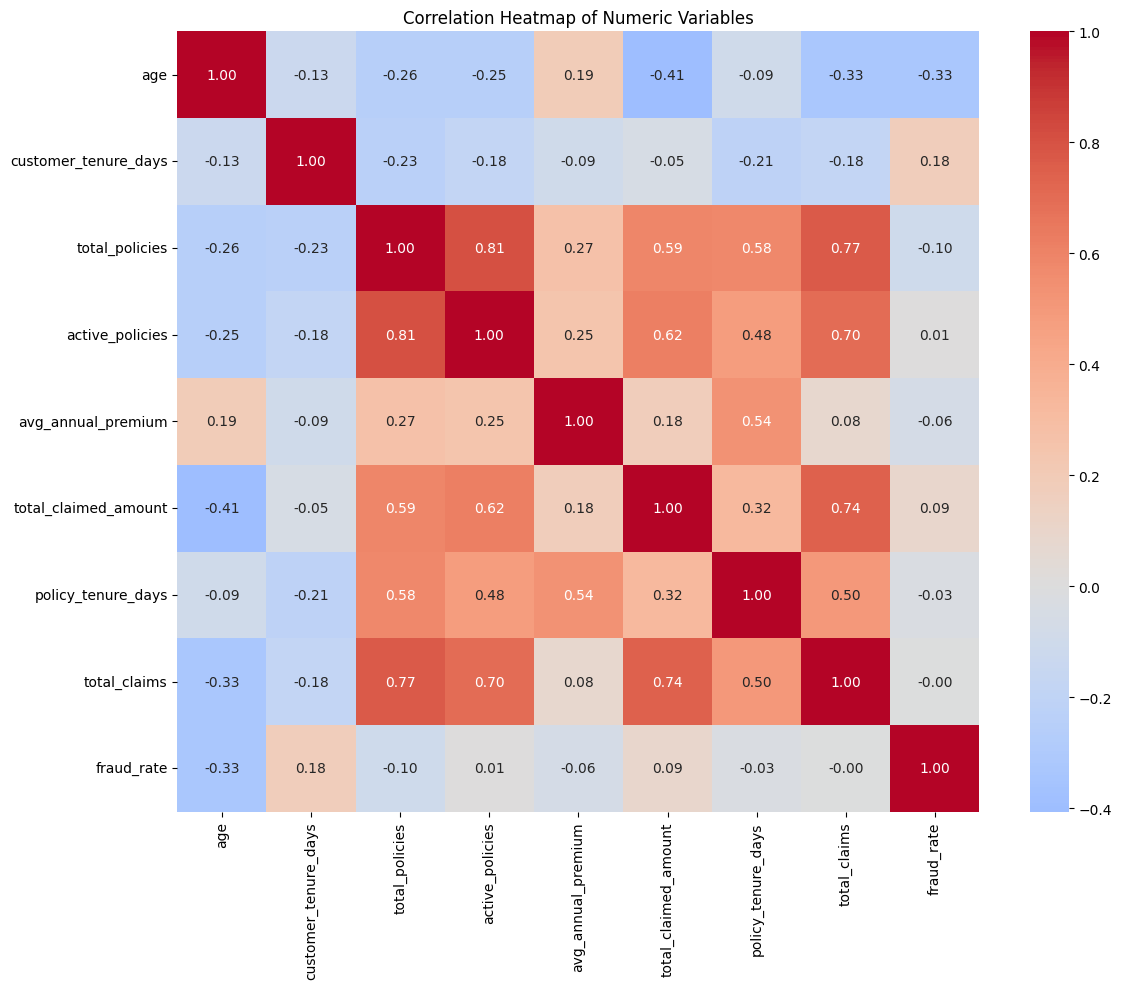

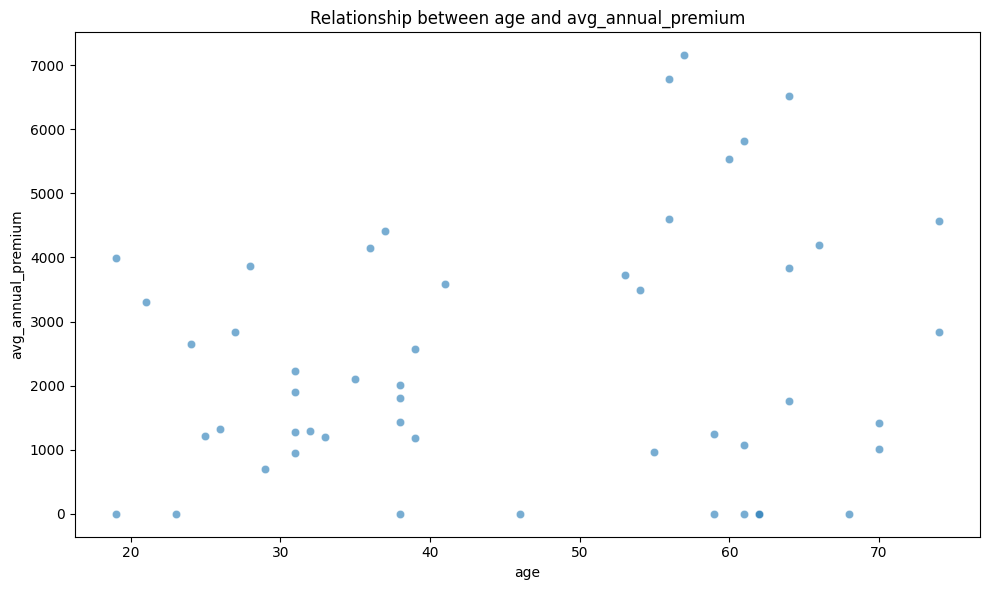

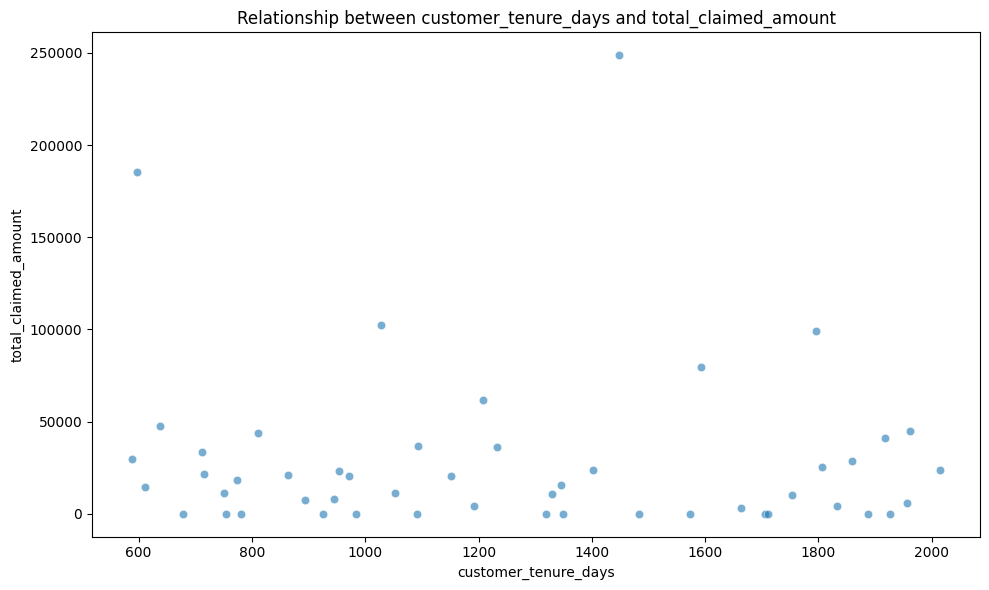

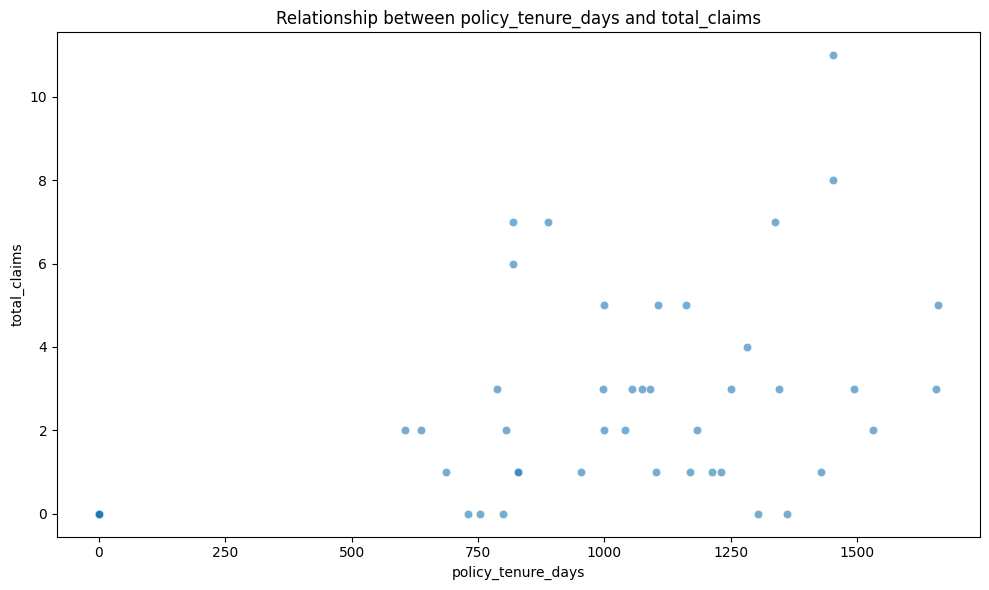

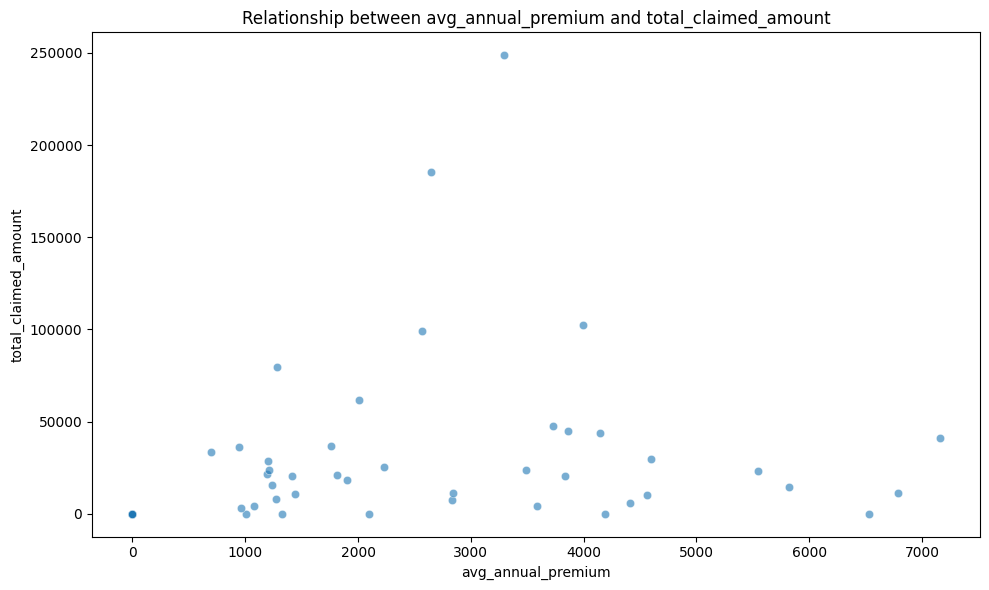

In [16]:
# Plotting numeric relationships
print("Plotting numeric relationships...")

# Select numeric columns for correlation
numeric_cols = ['age', 'customer_tenure_days', 'total_policies', 'active_policies',
               'avg_annual_premium', 'total_claimed_amount', 'policy_tenure_days',
               'total_claims', 'fraud_rate']

# Filter to only include columns that exist in the dataframe
numeric_cols = [col for col in numeric_cols if col in data.columns]

# Correlation heatmap
plt.figure(figsize=(12, 10))
corr = data[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Heatmap of Numeric Variables')
plt.tight_layout()
plt.show()

# Scatter plots for key relationships
pairs = [
    ('age', 'avg_annual_premium'),
    ('customer_tenure_days', 'total_claimed_amount'),
    ('policy_tenure_days', 'total_claims'),
    ('avg_annual_premium', 'total_claimed_amount')
]

for x, y in pairs:
    if x in data.columns and y in data.columns:
        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=data, x=x, y=y, alpha=0.6)
        plt.title(f'Relationship between {x} and {y}')
        plt.tight_layout()
        plt.show()

## Part A

###  ⁠For each customer compute:
•⁠  ⁠policy_tenure_days (days since first policy start)

•⁠  ⁠total_claims and total_claim_amount

•⁠  ⁠annual_premium_sum (sum of all active-policy premiums)

•⁠  ⁠fraud_claims (count of fraudulent claims detected)

In [18]:
def get_customer_metrics(df):
    """Create a DataFrame with the 4 key metrics for each customer."""
    # Create a copy of the original DataFrame to avoid modifying it
    result = df.copy()
    
    # 1. Policy tenure (already in days)
    result['policy_tenure_days'] = result['policy_tenure_days'].fillna(0)
    
    # 2. Total claims and claim amount
    result['total_claims'] = result['total_claims'].fillna(0)
    result['total_claim_amount'] = result['total_claimed_amount'].fillna(0)
    
    # 3. Annual premium sum
    result['annual_premium_sum'] = result['active_policies'] * result['avg_annual_premium']
    
    # 4. Fraud claims count
    result['fraud_claims'] = result['detection_count'].fillna(0)
    
    # Create a new DataFrame with just the customer ID and the 4 metrics
    metrics_df = result[['customer_id', 
                        'policy_tenure_days', 
                        'total_claims', 
                        'total_claim_amount',
                        'annual_premium_sum',
                        'fraud_claims']].copy()
    
    return metrics_df

# Create the metrics DataFrame
customer_metrics = get_customer_metrics(data)

# Display the first few rows
print("Customer Metrics Summary:")
display(customer_metrics.head())

# Show basic statistics
print("\nBasic Statistics:")
display(customer_metrics.describe().T)

Customer Metrics Summary:


,customer_id,policy_tenure_days,total_claims,total_claim_amount,annual_premium_sum,fraud_claims
0,1,1102.0,1.0,29430.41,4598.76,0.0
1,2,0.0,0.0,0.00,0.00,0.0
2,3,686.0,1.0,23396.02,5543.19,0.0
3,4,0.0,0.0,0.00,0.00,0.0
4,5,1251.0,3.0,43622.79,0.00,0.0



Basic Statistics:


,count,mean,std,min,25%,50%,75%,max
customer_id,50.0,25.500000,14.577380,1.0,13.25,25.500,37.75000,50.00
policy_tenure_days,50.0,898.280000,496.385714,0.0,736.50,999.000,1245.75000,1660.00
total_claims,50.0,2.400000,2.531435,0.0,0.00,2.000,3.00000,11.00
total_claim_amount,50.0,28407.053200,46313.551287,0.0,0.00,14996.165,32377.28750,248758.88
annual_premium_sum,50.0,3085.308386,3502.853199,0.0,0.00,1909.550,4552.03375,14913.86
fraud_claims,50.0,0.060000,0.313636,0.0,0.00,0.000,0.00000,2.00


## PART B

In [19]:
# Calculate lifetime metrics
print("Calculating lifetime metrics...")

# Create a copy to avoid SettingWithCopyWarning
lifetime_metrics = customer_metrics.copy()

# 1. Calculate Lifetime Value
lifetime_metrics['lifetime_value'] = lifetime_metrics['annual_premium_sum'] - lifetime_metrics['total_claim_amount']

# 2. Calculate Loss Ratio with division by zero handling
lifetime_metrics['loss_ratio'] = np.where(
    lifetime_metrics['annual_premium_sum'] > 0,
    lifetime_metrics['total_claim_amount'] / lifetime_metrics['annual_premium_sum'],
    np.nan  # or 0 if preferred
)

# Display results
print("\nFirst 5 customers' lifetime metrics:")
display(lifetime_metrics[['customer_id', 'lifetime_value', 'loss_ratio']].head(40))

# Show summary statistics
print("\nSummary Statistics:")
display(lifetime_metrics[['lifetime_value', 'loss_ratio']].describe().T)

Calculating lifetime metrics...

First 5 customers' lifetime metrics:


,customer_id,lifetime_value,loss_ratio
0,1,-24831.650000,6.399640
1,2,0.000000,NaN
2,3,-17852.830000,4.220678
3,4,0.000000,NaN
4,5,-43622.790000,NaN
5,6,-36918.510000,5.778136
6,7,1008.730000,0.000000
7,8,-33746.570000,5.715829
8,9,-20379.400000,18.138364
9,10,0.000000,NaN



Summary Statistics:


,count,mean,std,min,25%,50%,75%,max
lifetime_value,50.0,-25321.744814,44519.333085,-238864.18,-31001.492500,-11898.200000,0.00000,6526.420000
loss_ratio,36.0,10.937978,12.299057,0.00,2.552123,5.746983,17.68523,48.128199


## Part C

In [20]:
# Create a new DataFrame with the required metrics
combined_metrics = pd.DataFrame()

# 1. Add customer identifier
combined_metrics['customer_id'] = data['customer_id']

# 2. Add loss_ratio from lifetime_metrics
if 'loss_ratio' in lifetime_metrics.columns:
    combined_metrics['loss_ratio'] = lifetime_metrics['loss_ratio']
if 'lifetime_value' in lifetime_metrics.columns:
    combined_metrics['lifetime_value'] = lifetime_metrics['lifetime_value']

# 3. Add fraud_claims from customer_analytics
if 'fraud_claims' in customer_metrics.columns:
    combined_metrics['fraud_claims'] = customer_metrics['fraud_claims'].fillna(0)  # Replace NaN with 0

# 4. Calculate claim_frequency_per_year
# First, calculate policy_tenure_years if not already present
if 'policy_tenure_days' in data.columns:
    data['policy_tenure_years'] = data['policy_tenure_days'] / 365.25
    # Calculate claims per policy per year
    combined_metrics['claim_frequency_per_year'] = data['total_claims'] / data['policy_tenure_years']
    # Handle cases where policy_tenure_years is 0 or NaN
    combined_metrics['claim_frequency_per_year'] = combined_metrics['claim_frequency_per_year'].replace([np.inf, -np.inf], np.nan)

# 5. Add any additional useful metrics
if 'total_claims' in data.columns:
    combined_metrics['total_claims'] = data['total_claims']
if 'total_claim_amount' in data.columns:
    combined_metrics['total_claim_amount'] = data['total_claim_amount']
if 'annual_premium_sum' in lifetime_metrics.columns:
    combined_metrics['annual_premium_sum'] = lifetime_metrics['annual_premium_sum']

# Display the first few rows
print("Combined Metrics DataFrame:")
display(combined_metrics.head())

# Show summary statistics
print("\nSummary Statistics:")
display(combined_metrics.describe())



Combined Metrics DataFrame:


,customer_id,loss_ratio,lifetime_value,fraud_claims,claim_frequency_per_year,total_claims,annual_premium_sum
0,1,6.399640,-24831.65,0.0,0.331443,1.0,4598.76
1,2,NaN,0.00,0.0,NaN,0.0,0.00
2,3,4.220678,-17852.83,0.0,0.532434,1.0,5543.19
3,4,NaN,0.00,0.0,NaN,0.0,0.00
4,5,NaN,-43622.79,0.0,0.875899,3.0,0.00



Summary Statistics:


,customer_id,loss_ratio,lifetime_value,fraud_claims,claim_frequency_per_year,total_claims,annual_premium_sum
count,50.00000,36.000000,50.000000,50.000000,41.000000,50.000000,50.000000
mean,25.50000,10.937978,-25321.744814,0.060000,0.984980,2.400000,3085.308386
std,14.57738,12.299057,44519.333085,0.313636,0.821826,2.531435,3502.853199
min,1.00000,0.000000,-238864.180000,0.000000,0.000000,0.000000,0.000000
25%,13.25000,2.552123,-31001.492500,0.000000,0.382862,0.000000,0.000000
50%,25.50000,5.746983,-11898.200000,0.000000,0.814684,2.000000,1909.550000
75%,37.75000,17.685230,0.000000,0.000000,1.205446,3.000000,4552.033750
max,50.00000,48.128199,6526.420000,2.000000,3.121795,11.000000,14913.860000


In [21]:
def calculate_risk_score(combined_metrics):
    """
    Calculate a risk score (0-100) based on:
    - Loss ratio (50% weight)
    - Fraud claims (30% weight)
    - Claim frequency per year (20% weight)
    """
    # Create a copy to avoid modifying the original
    df = combined_metrics.copy()
    
    # 1. Normalize loss_ratio (0-50 points)
    # Cap loss_ratio at 1.0 (100%) for scoring purposes
    df['loss_ratio_score'] = np.minimum(df['loss_ratio'].fillna(0), 1.0) * 50
    
    # 2. Normalize fraud_claims (0-30 points)
    # Assuming fraud_claims is a count, we'll cap it at 5 for scoring
    max_fraud_claims = 5  # Adjust based on your data
    df['fraud_score'] = (np.minimum(df['fraud_claims'], max_fraud_claims) / max_fraud_claims) * 30
    
    # 3. Normalize claim_frequency_per_year (0-20 points)
    # Cap at 5 claims per year for scoring (adjust based on your data)
    max_claims_per_year = 5
    df['frequency_score'] = (np.minimum(df['claim_frequency_per_year'].fillna(0), max_claims_per_year) / 
                            max_claims_per_year) * 20
    
    # Calculate total risk score (0-100)
    df['risk_score'] = (df['loss_ratio_score'] + 
                       df['fraud_score'] + 
                       df['frequency_score'])
    
    # Ensure score is between 0 and 100
    df['risk_score'] = np.clip(df['risk_score'], 0, 100)
    
    # Round to 2 decimal places
    df['risk_score'] = df['risk_score'].round(2)
    
    # Create risk categories
    conditions = [
        (df['risk_score'] <= 30),
        (df['risk_score'] > 30) & (df['risk_score'] <= 60),
        (df['risk_score'] > 60)
    ]
    categories = ['Low Risk', 'Medium Risk', 'High Risk']
    df['risk_category'] = np.select(conditions, categories, default='Unknown')
    
    return df
new = calculate_risk_score(combined_metrics)
new.head()


,customer_id,loss_ratio,lifetime_value,fraud_claims,claim_frequency_per_year,total_claims,annual_premium_sum,loss_ratio_score,fraud_score,frequency_score,risk_score,risk_category
0,1,6.399640,-24831.65,0.0,0.331443,1.0,4598.76,50.0,0.0,1.325771,51.33,Medium Risk
1,2,NaN,0.00,0.0,NaN,0.0,0.00,0.0,0.0,0.000000,0.00,Low Risk
2,3,4.220678,-17852.83,0.0,0.532434,1.0,5543.19,50.0,0.0,2.129738,52.13,Medium Risk
3,4,NaN,0.00,0.0,NaN,0.0,0.00,0.0,0.0,0.000000,0.00,Low Risk
4,5,NaN,-43622.79,0.0,0.875899,3.0,0.00,0.0,0.0,3.503597,3.50,Low Risk


In [22]:
new['risk_score']
display(new[(new['risk_score'] > 40) & (new['risk_score'] <= 60) & (new['lifetime_value'] >= 0)][['customer_id', 'lifetime_value', 'risk_score', 'risk_category']].sort_values('risk_score'))

,customer_id,lifetime_value,risk_score,risk_category


## Assign customers to respective segments

In [23]:
def assign_customer_segments(df):
    """
    Assign customers to segments based on LTV and risk score:
    1. Premium Partner (LTV ≥ 0 & risk ≤ 40)
    2. Growth Prospect (LTV ≥ 0 & 40 < risk ≤ 60)
    3. Risk Management (LTV < 0 & risk > 60)
    4. Watch List (all others)
    """
    # Create conditions for each segment
    conditions = [
        # Premium Partner
        (df['lifetime_value'] >= 0) & (df['risk_score'] <= 40),
        # Growth Prospect
        (df['lifetime_value'] >= 0) & (df['risk_score'] > 40) & (df['risk_score'] <= 60),
        # Risk Management
        (df['lifetime_value'] < 0) & (df['risk_score'] > 60),
        # Watch List (default)
        True
    ]
    
    # Define segment names
    segments = ['Premium Partner', 'Growth Prospect', 'Risk Management', 'Watch List']
    
    # Assign segments
    df['segment'] = np.select(conditions, segments, default='Unknown')
    return df
assign_customer_segments(new)

,customer_id,loss_ratio,lifetime_value,fraud_claims,claim_frequency_per_year,total_claims,annual_premium_sum,loss_ratio_score,fraud_score,frequency_score,risk_score,risk_category,segment
0,1,6.399640,-24831.650000,0.0,0.331443,1.0,4598.760000,50.0,0.0,1.325771,51.33,Medium Risk,Watch List
1,2,NaN,0.000000,0.0,NaN,0.0,0.000000,0.0,0.0,0.000000,0.00,Low Risk,Premium Partner
2,3,4.220678,-17852.830000,0.0,0.532434,1.0,5543.190000,50.0,0.0,2.129738,52.13,Medium Risk,Watch List
3,4,NaN,0.000000,0.0,NaN,0.0,0.000000,0.0,0.0,0.000000,0.00,Low Risk,Premium Partner
4,5,NaN,-43622.790000,0.0,0.875899,3.0,0.000000,0.0,0.0,3.503597,3.50,Low Risk,Watch List
5,6,5.778136,-36918.510000,0.0,0.733925,3.0,7726.550000,50.0,0.0,2.935700,52.94,Medium Risk,Watch List
6,7,0.000000,1008.730000,0.0,0.000000,0.0,1008.730000,0.0,0.0,0.000000,0.00,Low Risk,Premium Partner
7,8,5.715829,-33746.570000,0.0,0.255598,1.0,7156.020000,50.0,0.0,1.022393,51.02,Medium Risk,Watch List
8,9,18.138364,-20379.400000,0.0,1.828078,5.0,1189.110000,50.0,0.0,7.312312,57.31,Medium Risk,Watch List
9,10,NaN,0.000000,0.0,NaN,0.0,0.000000,0.0,0.0,0.000000,0.00,Low Risk,Premium Partner


In [24]:
new.head()

,customer_id,loss_ratio,lifetime_value,fraud_claims,claim_frequency_per_year,total_claims,annual_premium_sum,loss_ratio_score,fraud_score,frequency_score,risk_score,risk_category,segment
0,1,6.399640,-24831.65,0.0,0.331443,1.0,4598.76,50.0,0.0,1.325771,51.33,Medium Risk,Watch List
1,2,NaN,0.00,0.0,NaN,0.0,0.00,0.0,0.0,0.000000,0.00,Low Risk,Premium Partner
2,3,4.220678,-17852.83,0.0,0.532434,1.0,5543.19,50.0,0.0,2.129738,52.13,Medium Risk,Watch List
3,4,NaN,0.00,0.0,NaN,0.0,0.00,0.0,0.0,0.000000,0.00,Low Risk,Premium Partner
4,5,NaN,-43622.79,0.0,0.875899,3.0,0.00,0.0,0.0,3.503597,3.50,Low Risk,Watch List


In [25]:
new[['customer_id', 'lifetime_value', 'loss_ratio', 'risk_score', 'segment']].copy()

,customer_id,lifetime_value,loss_ratio,risk_score,segment
0,1,-24831.650000,6.399640,51.33,Watch List
1,2,0.000000,NaN,0.00,Premium Partner
2,3,-17852.830000,4.220678,52.13,Watch List
3,4,0.000000,NaN,0.00,Premium Partner
4,5,-43622.790000,NaN,3.50,Watch List
5,6,-36918.510000,5.778136,52.94,Watch List
6,7,1008.730000,0.000000,0.00,Premium Partner
7,8,-33746.570000,5.715829,51.02,Watch List
8,9,-20379.400000,18.138364,57.31,Watch List
9,10,0.000000,NaN,0.00,Premium Partner


## Segment Analysis

In [26]:
new['segment'].value_counts()

segment
Watch List         30
Premium Partner    14
Risk Management     6
Name: count, dtype: int64

## final deliverable

In [29]:
selected_columns = ['customer_id', 'lifetime_value', 'loss_ratio', 'segment']
df_final = new[selected_columns]
df_final.head()

,customer_id,lifetime_value,loss_ratio,segment
0,1,-24831.65,6.399640,Watch List
1,2,0.00,NaN,Premium Partner
2,3,-17852.83,4.220678,Watch List
3,4,0.00,NaN,Premium Partner
4,5,-43622.79,NaN,Watch List


In [30]:
df_final.to_csv('/Users/dev/python1_cogitate/outputs/final_output.csv', index=False)
print("File saved to: /Users/dev/python1_cogitate/outputs/final_output.csv")

File saved to: /Users/dev/python1_cogitate/outputs/final_output.csv
